In this implementation:
- Missing values are treated as a separate category i.e. we do not replace missing values with NaN.
- Use 99:1 train to validation set ratio.
- Change for Demo


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
# Set printing options. 
# These options determine the way floating point numbers, arrays and
# other NumPy objects are displayed.
np.set_printoptions(threshold=50, edgeitems=20)

### Set data path

In [4]:
#PATH = 'data/porto-seguro/'
PATH = '/home/jd/data/PortoDriver/'

### Read csv data into dataframe

In [5]:
train_data_df = pd.read_csv(f'{PATH}train.csv')
test_data_df = pd.read_csv(f'{PATH}test.csv')

# I need differant Path
#train_data_df = pd.read_csv(f'{PATH}train/train.csv')
#test_data_df = pd.read_csv(f'{PATH}test/test.csv')

In [6]:
# test_data need target
test_data_df['target']=0

### List of column names

In [7]:
all_var = [var for var in train_data_df.columns]

In [8]:
all_var

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Create list of categorical and continuous variables

In [9]:
cat_vars = [var for var in train_data_df.columns if var.endswith('cat')]
bin_vars = [var for var in train_data_df.columns if var.endswith('bin')]
ind_vars = ['ps_ind_01', 'ps_ind_03','ps_ind_14', 'ps_ind_15']
cat_vars = cat_vars + bin_vars #+ ind_vars
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [10]:
cont_vars = [var for var in train_data_df.columns if var not in cat_vars]
cont_vars

['id',
 'target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [11]:
for var in cat_vars: 
    train_data_df[var] = train_data_df[var].astype('category').cat.as_ordered()
    test_data_df[var] = test_data_df[var].astype('category').cat.as_ordered()

In [12]:
for var in cont_vars:
    train_data_df[var] = train_data_df[var].astype('float32')
    test_data_df[var] = test_data_df[var].astype('float32')

In [13]:
cont_vars[1]

'target'

In [14]:
del cont_vars[1]

In [15]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null float32
target            595212 non-null float32
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null f

### Display training data sample

In [16]:
train_data_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7.0,0.0,2.0,2,5.0,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0,1,1,0,0,1
1,9.0,0.0,1.0,1,7.0,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0,1,1,0,1,0
2,13.0,0.0,5.0,4,9.0,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0,1,1,0,1,0
3,16.0,0.0,0.0,1,2.0,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0,0,0,0,0,0
4,17.0,0.0,0.0,2,0.0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0,0,0,1,1,0


### Display test data sample

In [17]:
test_data_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,0.0,0.0,1,8.0,1,0,0,1,0,0,...,1.0,1.0,12.0,0,1,1,0,0,1,0.0
1,1.0,4.0,2,5.0,1,0,0,0,0,1,...,0.0,3.0,10.0,0,0,1,1,0,1,0.0
2,2.0,5.0,1,3.0,0,0,0,0,0,1,...,0.0,2.0,4.0,0,0,0,0,0,0,0.0
3,3.0,0.0,1,6.0,0,0,1,0,0,0,...,1.0,0.0,5.0,1,0,1,0,0,0,0.0
4,4.0,5.0,1,7.0,0,0,0,0,0,1,...,0.0,0.0,4.0,0,1,1,0,0,1,0.0


### Create validation set indices

In [18]:
# Tune VAL_PCT hyperparameter
# Tune MAX_FOLDS hyperparameter
VAL_FRAC = 0.01
MAX_FOLDS = 5

num_obs = train_data_df.shape[0]

cv_dict = {f'ids_fold_{num_fold}': get_cv_idxs(n=num_obs, cv_idx=num_fold, val_pct=VAL_FRAC) for num_fold in range(MAX_FOLDS)}

In [19]:
len(cv_dict['ids_fold_0'])

5952

### Set response variable

In [20]:
TARGET_VAR = "target"

### Train set, response variable, feature scaling

In [21]:
# This function is giving weird numbers to id
train, target, nas, mapper = proc_df(df=train_data_df, y_fld=TARGET_VAR, do_scale=True, skip_flds=['id'])

# for test
test_df, target2, nas2, mapper2 = proc_df(df=test_data_df, y_fld=TARGET_VAR, do_scale=True, skip_flds=['id'],
                                  mapper=mapper, na_dict=nas)

In [22]:
# Reset Id doesnt appear to work
train.id =train_data_df.id
test_df.id=test_data_df.id

/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
train.id

0               7.0
1               9.0
2              13.0
3              16.0
4              17.0
5              19.0
6              20.0
7              22.0
8              26.0
9              28.0
10             34.0
11             35.0
12             36.0
13             43.0
14             46.0
15             48.0
16             50.0
17             58.0
18             61.0
19             64.0
20             65.0
21             66.0
22             72.0
23             74.0
24             77.0
25             78.0
26             79.0
27             80.0
28             84.0
29             85.0
            ...    
595182    1487945.0
595183    1487951.0
595184    1487952.0
595185    1487954.0
595186    1487957.0
595187    1487958.0
595188    1487962.0
595189    1487963.0
595190    1487964.0
595191    1487968.0
595192    1487973.0
595193    1487975.0
595194    1487976.0
595195    1487980.0
595196    1487983.0
595197    1487988.0
595198    1487990.0
595199    1487992.0
595200    1487994.0


### Convert categorical values to type `category`

In [24]:
for var in cat_vars: 
    train[var] = train[var].astype('category').cat.as_ordered()
    test_df[var] = test_df[var].astype('category').cat.as_ordered()

### Convert remaining variables to `float32`

In [25]:
del cont_vars[0]

In [26]:
for var in cont_vars:
    train[var] = train[var].astype('float32')
    test_df[var] = test_df[var].astype('float32')

target.astype('float32')

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
       ...,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 57 columns):
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null float32
ps_reg_02         595212 non-null float32
ps_reg_03         595212 non-null f

### Gini metric

In [28]:
from sklearn.metrics import roc_auc_score

inv_log = lambda x : np.exp(x)

def gini_metric(preds, targs):
    preds = inv_log(preds)
    auc = roc_auc_score(y_true=targs, y_score=preds)
    return 2 * auc - 1

### Create embeddings

In [29]:
cat_sz = [(c, len(train[c].cat.categories) + 1) for c in cat_vars]

In [30]:
cat_sz

[('ps_ind_02_cat', 6),
 ('ps_ind_04_cat', 4),
 ('ps_ind_05_cat', 9),
 ('ps_car_01_cat', 14),
 ('ps_car_02_cat', 4),
 ('ps_car_03_cat', 4),
 ('ps_car_04_cat', 11),
 ('ps_car_05_cat', 4),
 ('ps_car_06_cat', 19),
 ('ps_car_07_cat', 4),
 ('ps_car_08_cat', 3),
 ('ps_car_09_cat', 7),
 ('ps_car_10_cat', 4),
 ('ps_car_11_cat', 105),
 ('ps_ind_06_bin', 3),
 ('ps_ind_07_bin', 3),
 ('ps_ind_08_bin', 3),
 ('ps_ind_09_bin', 3),
 ('ps_ind_10_bin', 3),
 ('ps_ind_11_bin', 3),
 ('ps_ind_12_bin', 3),
 ('ps_ind_13_bin', 3),
 ('ps_ind_16_bin', 3),
 ('ps_ind_17_bin', 3),
 ('ps_ind_18_bin', 3),
 ('ps_calc_15_bin', 3),
 ('ps_calc_16_bin', 3),
 ('ps_calc_17_bin', 3),
 ('ps_calc_18_bin', 3),
 ('ps_calc_19_bin', 3),
 ('ps_calc_20_bin', 3)]

In [31]:
emb_szs = [(c, min(100, (c + 1) // 2)) for _, c in cat_sz]

In [32]:
emb_szs

[(6, 3),
 (4, 2),
 (9, 5),
 (14, 7),
 (4, 2),
 (4, 2),
 (11, 6),
 (4, 2),
 (19, 10),
 (4, 2),
 (3, 2),
 (7, 4),
 (4, 2),
 (105, 53),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2)]

### Model Architecture / Hyperparameters

In [33]:
layer_1 = 1024
layer_2 = 512
layer_3 = 256
batch_size = 256
embed_dropout = 0.01
layer_dropout = 0.15

In [34]:
# Original
# Create model with all category variables
#md = ColumnarModelData.from_data_frame(path=PATH, 
#                                       val_idxs=cv_dict['ids_fold_0'], 
#                                       df=train, 
#                                       y=target, 
#                                       cat_flds=cat_vars, 
#                                       bs=batch_size)

In [35]:
# Create model with a test to allow for predictions
md = ColumnarModelData.from_data_frame(path=PATH, 
                                       val_idxs=cv_dict['ids_fold_0'], 
                                       df=train, 
                                       y=target, 
                                       cat_flds=cat_vars, 
                                       bs=batch_size,
                                       test_df=test_df)

### Model learner

In [36]:
y_range = (0, 1)

In [37]:
# Use all categorical variables
m = md.get_learner(emb_szs=emb_szs, 
                   n_cont=(len(train.columns) - len(cat_vars)),
                   emb_drop=embed_dropout, 
                   out_sz=1, 
                   szs=[layer_1, layer_2], 
                   drops=[layer_dropout, layer_dropout], 
                   y_range=y_range )
                #y_range=None )


In [38]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.03539  0.03724]                                     



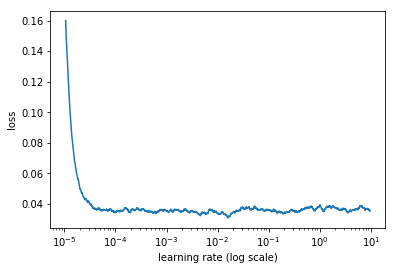

In [39]:
m.sched.plot()

In [40]:
lr = 0.0001

In [41]:
m.fit(lrs=lr, n_cycle=10, metrics=[accuracy, gini_metric])

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[ 0.       0.03689  0.03575  0.96276  0.18696]                   
[ 1.       0.03507  0.03568  0.96276  0.22363]                   
[ 2.       0.03593  0.03568  0.96276  0.25449]                   
[ 3.       0.03451  0.03582  0.96276  0.23731]                   
[ 4.       0.03509  0.03587  0.96276  0.22229]                   
[ 5.       0.0356   0.03561  0.96276  0.25232]                   
[ 6.       0.03445  0.03572  0.96276  0.23367]                   
[ 7.       0.03446  0.03582  0.96276  0.23263]                   
[ 8.       0.03344  0.03581  0.96276  0.23778]                   
[ 9.       0.03441  0.03592  0.96276  0.20332]                   



In [42]:
m.fit(lrs=lr, n_cycle=3, cycle_len=3, metrics=[accuracy, gini_metric], cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=21), HTML(value='')))

[ 0.       0.03398  0.03593  0.96276  0.20579]                   
[ 1.       0.03418  0.03606  0.96276  0.21035]                   
[ 2.       0.03431  0.03608  0.96276  0.22225]                   
[ 3.       0.03317  0.03615  0.96276  0.20844]                   
[ 4.       0.03387  0.03608  0.96276  0.18685]                   
[ 5.       0.03323  0.03627  0.96276  0.19104]                   
[ 6.       0.03437  0.03631  0.96276  0.19518]                   
[ 7.       0.03335  0.03637  0.96276  0.20034]                   
[ 8.       0.03346  0.03642  0.96276  0.19969]                   
[ 9.       0.0357   0.03641  0.96276  0.19472]                   
[ 10.        0.03376   0.03667   0.96276   0.20102]              
[ 11.        0.0339    0.03684   0.96276   0.15924]              
[ 12.        0.03442   0.03682   0.96276   0.18221]              
[ 13.        0.03414   0.03702   0.96276   0.16909]              
[ 14.        0.03338   0.0367    0.96276   0.17872]              
[ 15.     

In [43]:
# Predictions for the validation set
m.predict()

array([[ 0.05171],
       [ 0.03971],
       [ 0.03639],
       [ 0.02431],
       [ 0.01119],
       [ 0.07818],
       [ 0.02799],
       [ 0.02744],
       [ 0.0505 ],
       [ 0.02255],
       [ 0.01318],
       [ 0.03495],
       [ 0.02152],
       [ 0.01097],
       [ 0.009  ],
       [ 0.08269],
       [ 0.06356],
       [ 0.03074],
       [ 0.01458],
       [ 0.03196],
       ..., 
       [ 0.00748],
       [ 0.01833],
       [ 0.00501],
       [ 0.0352 ],
       [ 0.04361],
       [ 0.05328],
       [ 0.02082],
       [ 0.02406],
       [ 0.00948],
       [ 0.01405],
       [ 0.03202],
       [ 0.02846],
       [ 0.15857],
       [ 0.03228],
       [ 0.0444 ],
       [ 0.09428],
       [ 0.01881],
       [ 0.01773],
       [ 0.00697],
       [ 0.01115]], dtype=float32)

In [44]:
m

MixedInputModel (
  (embs): ModuleList (
    (0): Embedding(6, 3)
    (1): Embedding(4, 2)
    (2): Embedding(9, 5)
    (3): Embedding(14, 7)
    (4): Embedding(4, 2)
    (5): Embedding(4, 2)
    (6): Embedding(11, 6)
    (7): Embedding(4, 2)
    (8): Embedding(19, 10)
    (9): Embedding(4, 2)
    (10): Embedding(3, 2)
    (11): Embedding(7, 4)
    (12): Embedding(4, 2)
    (13): Embedding(105, 53)
    (14): Embedding(3, 2)
    (15): Embedding(3, 2)
    (16): Embedding(3, 2)
    (17): Embedding(3, 2)
    (18): Embedding(3, 2)
    (19): Embedding(3, 2)
    (20): Embedding(3, 2)
    (21): Embedding(3, 2)
    (22): Embedding(3, 2)
    (23): Embedding(3, 2)
    (24): Embedding(3, 2)
    (25): Embedding(3, 2)
    (26): Embedding(3, 2)
    (27): Embedding(3, 2)
    (28): Embedding(3, 2)
    (29): Embedding(3, 2)
    (30): Embedding(3, 2)
  )
  (lins): ModuleList (
    (0): Linear (162 -> 1024)
    (1): Linear (1024 -> 512)
  )
  (bns): ModuleList (
    (0): BatchNorm1d(1024, eps=1e-05, momen

## Prediction

In [45]:
m.save('val0')

In [46]:
m.load('val0')

In [47]:
x,y=m.predict_with_targs()

In [48]:
gini_metric(x,y)

0.16817640979321014

In [49]:
pred_test=m.predict(True)

In [50]:
# add a predictions column to the test_df
test_df['pred_target']=pred_test

In [51]:
test_df['pred_target'][:5]

0    0.032407
1    0.036474
2    0.024713
3    0.012117
4    0.034148
Name: pred_target, dtype: float32

## Analyze

In [52]:
test_df.pred_target.max(), test_df.pred_target.min()

(0.95303863, 0.00058412523)

In [53]:
test_df.nlargest(5, 'pred_target')

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,pred_target
219621,2.066563,2,0.583978,2,4,1,1,2,1,1,...,0.463923,-1.104669,0.167831,1,2,1,1,1,1,0.953039
437814,0.050218,1,-1.638327,1,1,1,2,1,1,1,...,0.463923,0.665362,-0.560329,1,2,2,1,1,2,0.934007
428450,-0.453868,3,-1.638327,2,1,1,2,1,1,1,...,0.463923,-0.514659,1.260071,2,2,1,2,1,1,0.924385
590211,0.050218,1,-1.638327,1,1,1,1,1,2,1,...,-1.198640,0.075352,-0.560329,1,2,1,1,2,2,0.898887
137691,0.554304,4,0.213594,2,2,1,1,2,1,1,...,-1.198640,1.255373,0.531911,1,1,2,1,1,1,0.887673


In [54]:
test_df.nsmallest(5, 'pred_target')

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,pred_target
619009,-0.453868,2,-0.897559,2,2,2,1,1,1,1,...,-0.367359,0.665362,0.531911,1,1,2,1,1,1,0.000584
766528,-0.453868,2,-0.156790,3,2,2,1,1,1,1,...,-0.367359,-0.514659,-0.560329,1,2,2,1,1,1,0.000857
536964,2.570649,2,-0.527174,3,2,1,1,1,2,1,...,2.126487,-1.104669,0.167831,2,2,1,1,1,1,0.000867
540078,-0.957955,2,-0.527174,2,2,1,1,1,2,1,...,0.463923,0.075352,2.352311,1,2,1,1,1,1,0.000872
592040,-0.957955,2,-0.897559,2,2,1,2,1,1,1,...,0.463923,-0.514659,1.624151,1,1,2,1,1,1,0.000912


## Submission

In [55]:
## Sets up the test use
submission = pd.DataFrame({'id': test_data_df.id, 'target': test_df.pred_target})
submission.id = submission.id.astype(int)
# Shows 5 to ensure formatting is correct
submission[:10]

,id,target
0,0,0.032407
1,1,0.036474
2,2,0.024713
3,3,0.012117
4,4,0.034148
5,5,0.139604
6,6,0.010145
7,8,0.025084
8,10,0.029866
9,11,0.019766


In [56]:
# Makes the submission name out of folders
path3 = PATH +'submits/'
## labels submissions in order
numFiles=len(os.listdir(path3))
subm_name = 'submission'+str(numFiles)+'.csv.gz'

In [57]:
## prints it out to downloaded
submission.to_csv((path3+subm_name), index=False, compression='gzip')
print ('http://localhost:8888/view/data/PortoDriver/submits/'+subm_name)

http://localhost:8888/view/data/PortoDriver/submits/submission26.csv.gz
